In [73]:
# !pip install spacy 
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install wordcloud
# !pip install scikit-learn

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 343.4 kB/s eta 0:00:37
     --------------------------------------- 0.1/12.8 MB 343.4 kB/s eta 0:00:37
     --------------------------------------- 0.1/12.8 MB 343.4 kB/s eta 0:00:37
     --------------------------------------- 0.1/12.8 MB 343.4 kB/s eta 0:00:37
     --------------------------------------- 0.1/12.8 MB 343.4 kB/s eta 0:00:37
     -------------------

In [98]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
datasetPath = "../Dataset/twitter_training_large_data.csv"
df = pd.read_csv(datasetPath, header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [99]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237662 entries, 0 to 237661
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  237655 non-null  object
 1   text       236972 non-null  object
dtypes: object(2)
memory usage: 3.6+ MB


In [100]:
df['sentiment'].value_counts()

sentiment
Positive      92816
Neutral       73210
Negative      57773
Irrelevant    12816
Name: count, dtype: int64

In [102]:
df.columns  

Index(['sentiment', 'text'], dtype='object')

In [103]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

<Figure size 2000x1000 with 0 Axes>

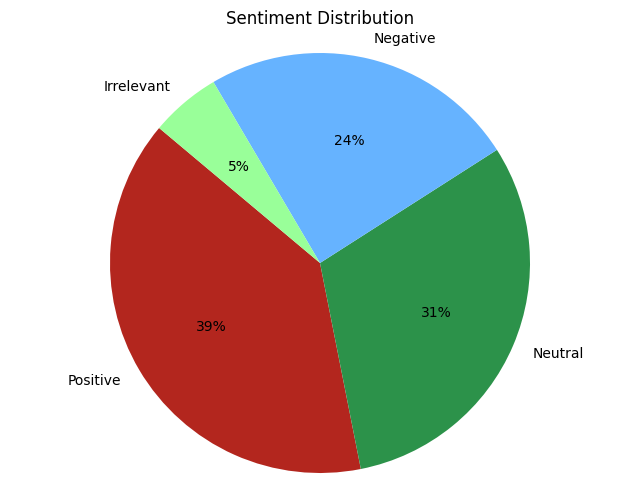

In [104]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%', startangle=140, colors=['#B3261E','#2C924A','#66b3ff','#99ff99'])

plt.title('Sentiment Distribution')

plt.axis('equal')

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


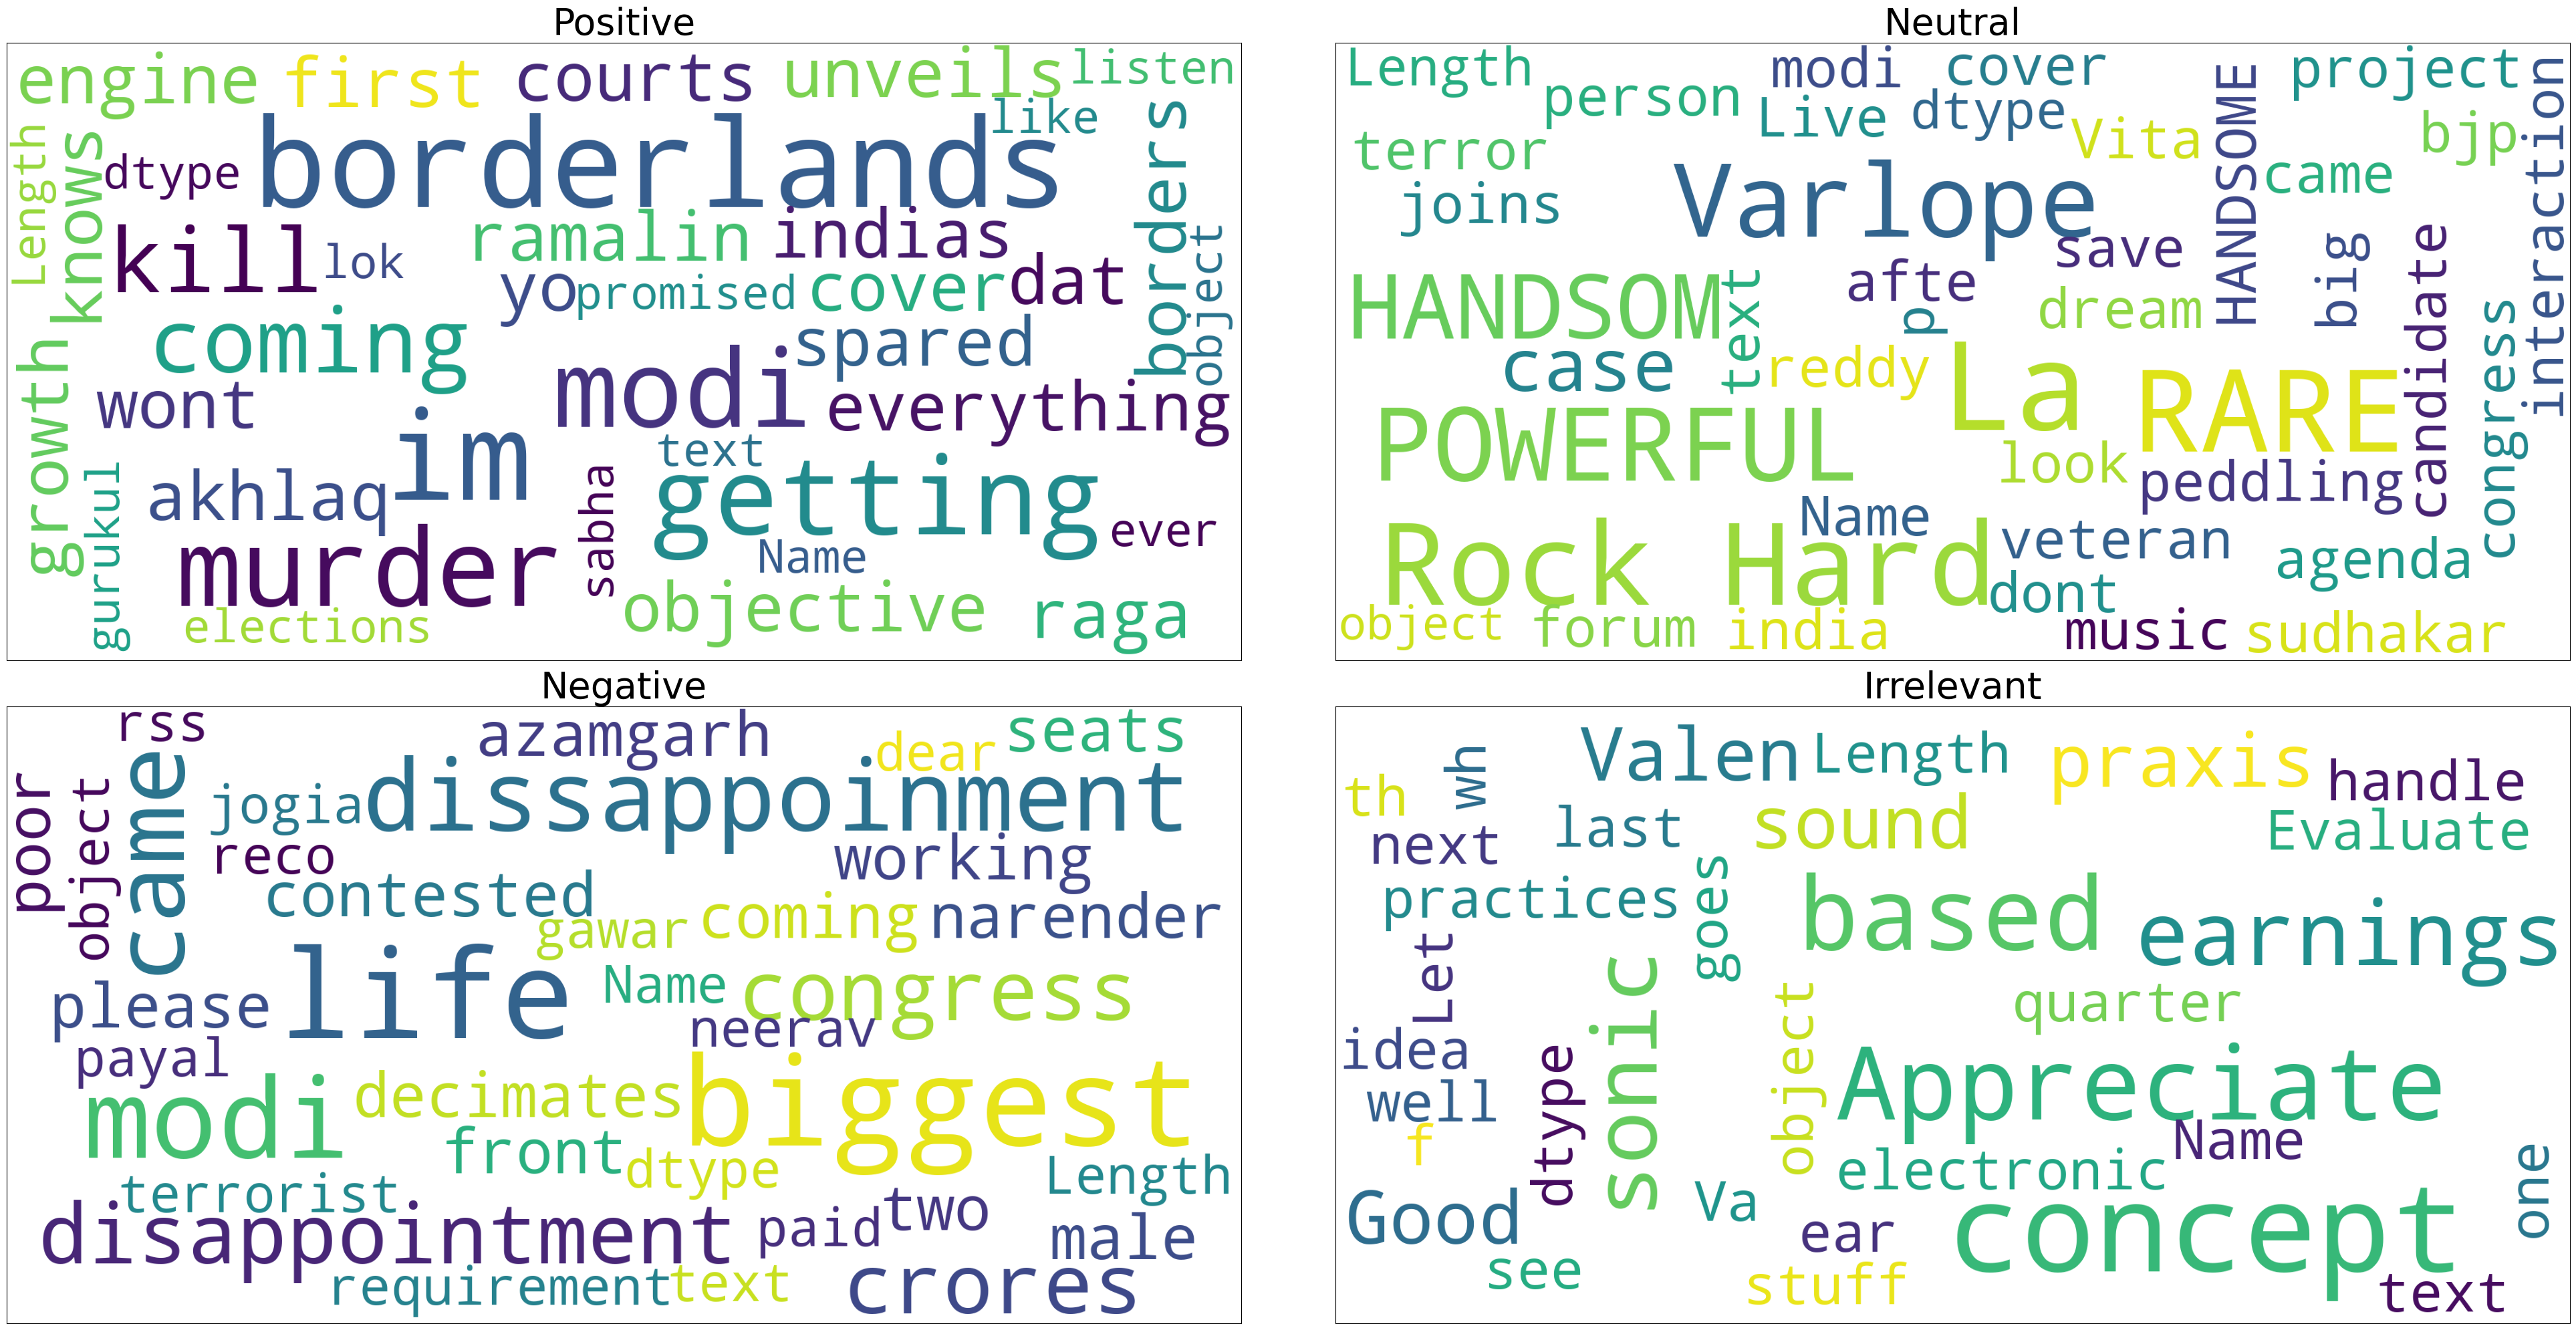

In [110]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords list if not already downloaded
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Assuming df is your DataFrame containing sentiment and text columns
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.tight_layout()
plt.show()


In [116]:
import pandas as pd
import re

# Assuming df is your DataFrame containing 'text' column
df['text'] = df['text'].str.lower()  # Convert text to lowercase

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

# Function to remove special characters
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Function to remove retweets
def remove_rt(text):
    return re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)

# Applying text cleaning functions
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_special_chars)
df['text'] = df['text'].apply(remove_rt)

# Now your DataFrame 'df' should contain cleaned text data in the 'text' column


In [117]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [119]:
X_train.shape, X_test.shape

((189292,), (47323,))

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Import NLTK stopwords and convert them into a list
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)

# Define TfidfVectorizer with stopwords parameter as a list
tfidf = TfidfVectorizer(stop_words=stop_words_list)

clf = Pipeline([('tfidf', tfidf), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


In [ ]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define TfidfVectorizer with stopwords parameter as a list and set max_features
tfidf = TfidfVectorizer(stop_words=list(stopwords), max_features=1000)

# Reduce the number of estimators to speed up training
clf = Pipeline([('tfidf', tfidf), ('clf', RandomForestClassifier(n_estimators=50, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

# Approx = 0.8447421299397186 (84%) accuracy  - > Excution time less than 10 seconds (10x faster) 

In [97]:
# save model
import pickle
pickle.dump(clf, open('../Modal/twitter_sentiment_Capstone_3_largeData.pkl', 'wb'))
